In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"

In [3]:
%cd /content/gdrive/My Drive/Kaggle

/content/gdrive/My Drive/Kaggle


In [4]:
!kaggle datasets download -d nowke9/ipldata

  0% 0.00/1.20M [00:00<?, ?B/s]
100% 1.20M/1.20M [00:00<00:00, 39.1MB/s]


In [5]:
!ls

deliveries.csv	ipldata.zip  kaggle.json  matches.csv


In [6]:
!unzip \*.zip  && rm *.zip

Archive:  ipldata.zip
replace deliveries.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace matches.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style(style='darkgrid')

In [8]:
data=pd.read_csv('deliveries.csv')
data.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [9]:
data2= pd.read_csv('matches.csv')
data2.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [10]:
data_f = data2.loc[data2.team1.isin(['Rajasthan Royals','Mumbai Indians'])] 
data_f = data_f.loc[data_f.team2.isin(['Rajasthan Royals','Mumbai Indians'])] 
data_f

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
85,86,2008,Mumbai,2008-05-07,Rajasthan Royals,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,7,A Nehra,Dr DY Patil Sports Academy,DJ Harper,RE Koertzen,NaN
112,113,2008,Jaipur,2008-05-26,Mumbai Indians,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,5,Sohail Tanvir,Sawai Mansingh Stadium,BF Bowden,K Hariharan,NaN
159,160,2009,Durban,2009-05-14,Rajasthan Royals,Mumbai Indians,Rajasthan Royals,bat,normal,0,Rajasthan Royals,2,0,SK Warne,Kingsmead,BR Doctrove,DJ Harper,NaN
175,176,2010,Mumbai,2010-03-13,Mumbai Indians,Rajasthan Royals,Mumbai Indians,bat,normal,0,Mumbai Indians,4,0,YK Pathan,Brabourne Stadium,RE Koertzen,RB Tiffin,NaN
218,219,2010,Jaipur,2010-04-11,Mumbai Indians,Rajasthan Royals,Rajasthan Royals,field,normal,0,Mumbai Indians,37,0,SR Tendulkar,Sawai Mansingh Stadium,BR Doctrove,SK Tarapore,NaN
266,267,2011,Jaipur,2011-04-29,Mumbai Indians,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,7,J Botha,Sawai Mansingh Stadium,Asad Rauf,SK Tarapore,NaN
298,299,2011,Mumbai,2011-05-20,Mumbai Indians,Rajasthan Royals,Mumbai Indians,bat,normal,0,Rajasthan Royals,0,10,SR Watson,Wankhede Stadium,RE Koertzen,PR Reiffel,NaN
318,319,2012,Mumbai,2012-04-11,Mumbai Indians,Rajasthan Royals,Rajasthan Royals,field,normal,0,Mumbai Indians,27,0,KA Pollard,Wankhede Stadium,Aleem Dar,BNJ Oxenford,NaN
376,377,2012,Jaipur,2012-05-20,Rajasthan Royals,Mumbai Indians,Rajasthan Royals,bat,normal,0,Mumbai Indians,0,10,DR Smith,Sawai Mansingh Stadium,HDPK Dharmasena,C Shamshuddin,NaN
402,403,2013,Jaipur,2013-04-17,Rajasthan Royals,Mumbai Indians,Rajasthan Royals,bat,normal,0,Rajasthan Royals,87,0,AM Rahane,Sawai Mansingh Stadium,Aleem Dar,C Shamshuddin,NaN


Finally , We have got a complete dataset for all the matches of MI VS RR

**Let's do Q1 now**

MI Wins - 10
RR Wins - 10


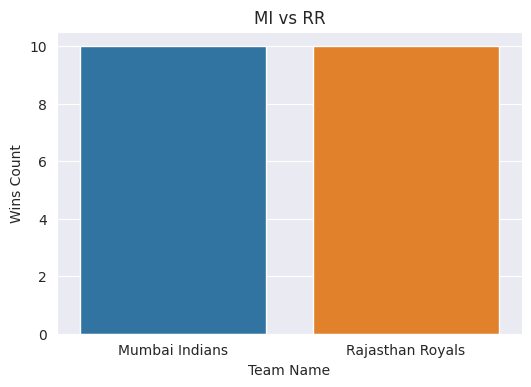

In [11]:
plt.figure(dpi=100)
sns.countplot(x='winner',data = data_f)
plt.ylabel('Wins Count')
plt.xlabel('Team Name')
plt.title('MI vs RR')
A,B =data_f.winner.value_counts()

print('MI Wins -',B)
print('RR Wins -',A)

plt.show()


In [12]:
data_f = data_f.loc[data_f.season.isin(['2017','2018','2019'])] 
data_f

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
656,7914,2018,Jaipur,22/04/18,Mumbai Indians,Rajasthan Royals,Mumbai Indians,bat,normal,0,Rajasthan Royals,0,3,J Archer,Sawai Mansingh Stadium,Rod Tucker,K Ananthapadmanabhan,Nitin Menon
682,7940,2018,Mumbai,13/05/18,Mumbai Indians,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,7,JC Buttler,Wankhede Stadium,Nitin Menon,S Ravi,C Shamshuddin
722,11318,2019,Mumbai,13/04/19,Mumbai Indians,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,4,JC Buttler,Wankhede Stadium,Nitin Menon,Nanda Kishore,Marais Erasmus
731,11327,2019,Jaipur,20/04/19,Mumbai Indians,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,5,SPD Smith,Sawai Mansingh Stadium,S Ravi,Yeshwant Barde,O Nandan


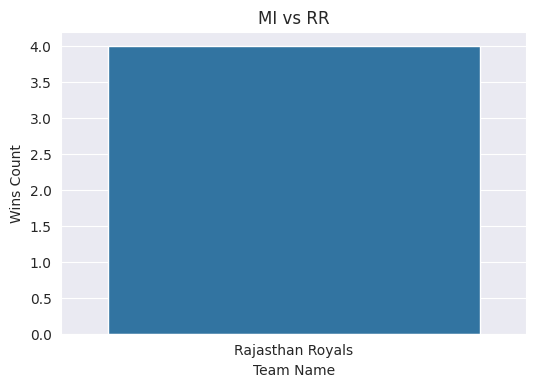

In [14]:
plt.figure(dpi=100)
sns.countplot(x='winner',data = data_f)
plt.ylabel('Wins Count')
plt.xlabel('Team Name')
plt.title('MI vs RR')

plt.show()


Overall there was a fight but in last 4 matches RR has won all. Therefore mark RR considering out analysis.

**Let's do Q2 now**

**Finding BIM score for Buttler , SPD Smith and De Kock and comparing them**

In [19]:
data_n = data.loc[data.bowling_team.isin(['Mumbai Indians'])]
data_n = data_n.loc[data.batting_team.isin(['Rajasthan Royals'])]
data_n.batsman.value_counts(ascending=False)

AM Rahane          274
SR Watson          262
SV Samson          223
SPD Smith          139
BJ Hodge           112
JC Buttler         106
R Dravid           102
STR Binny           89
OA Shah             69
YK Pathan           69
DH Yagnik           62
KK Nair             59
SA Asnodkar         58
RA Jadeja           56
JP Faulkner         55
GC Smith            50
J Botha             45
AL Menaria          42
RJ Quiney           40
AA Jhunjhunwala     34
BA Stokes           31
Niraj Patel         30
P Dogra             30
R Parag             29
AC Voges            27
M Kaif              23
KK Cooper           21
NV Ojha             21
LRPL Taylor         19
AP Dole             19
AS Raut             17
Kamran Akmal        16
FY Fazal            16
K Gowtham           12
RA Tripathi         11
UBT Chand           10
J Archer             9
SK Trivedi           9
SD Chitnis           9
SK Warne             9
AD Mascarenhas       8
S Gopal              7
MJ Lumb              6
Sohail Tanv

In [22]:
data_b =  data_n.loc[data.batsman.isin(['JC Buttler'])]

In [24]:
data_b.batsman_runs.sum()

192

In [25]:
data_b.match_id.nunique()

3

In [26]:
data_b.batsman_runs.value_counts()

1    40
0    31
4    17
6    12
2     6
Name: batsman_runs, dtype: int64

In [28]:
data_b.over.value_counts().sum()

106

In [49]:
boundary_runs = (17*4) + (12*6)
print(boundary_runs)

140


In [52]:
BIS_Score_Buttler = np.round((192+140)-(52*0.5)/140,2)
print(BIS_Score_Buttler)


331.81


In [32]:
data_ss = data_n.loc[data.batsman.isin(['SPD Smith'])]

In [33]:
data_ss.match_id.nunique()

4

In [34]:
data_ss.batsman_runs.sum()

173

In [36]:
data_ss.batsman_runs.value_counts()

1    60
0    43
2    17
4    16
6     2
3     1
Name: batsman_runs, dtype: int64

In [38]:
data_ss.over.value_counts().sum()

139

In [56]:
boundary_runs_smith = (16*4)+(6*2)
print(boundary_runs_smith)

76


In [58]:
BIS_Score_Smith = np.round((173+76)-(94*0.5)/139,2)
print(BIS_Score_Smith)

248.66


In [65]:
data_m = data.loc[data.batting_team.isin(['Mumbai Indians'])]
data_m = data_m.loc[data.bowling_team.isin(['Rajasthan Royals'])]
data_m.batsman.value_counts(ascending=False)

SR Tendulkar       245
KA Pollard         213
RG Sharma          206
AT Rayudu          177
AS Yadav           126
DR Smith           115
Q de Kock          102
ST Jayasuriya       99
LMP Simmons         92
CJ Anderson         84
AP Tare             81
KD Karthik          75
YV Takawale         65
Ishan Kishan        56
HH Pandya           55
MEK Hussey          53
AM Nayar            52
E Lewis             46
SS Tiwary           45
Harbhajan Singh     41
JP Duminy           39
RV Uthappa          33
UBT Chand           31
A Symonds           27
PA Patel            25
RE Levi             22
SL Malinga          18
GJ Maxwell          17
DJ Jacobs           16
BCJ Cutting         16
TL Suman            16
KH Pandya           16
MG Johnson          16
R Sathish           14
AJ Finch            14
DJ Bravo             9
RT Ponting           9
JEC Franklin         8
AM Rahane            7
MK Pandey            6
R McLaren            5
AG Murtaza           5
DS Kulkarni          5
R Dhawan   

In [42]:
data_dk = data_m.loc[data.batsman.isin(['Q de Kock'])]

In [43]:
data_dk.batsman_runs.sum()

150

In [44]:
data_dk.match_id.nunique()

2

In [45]:
data_dk.batsman_runs.value_counts()

1    44
0    29
4    12
2    11
6     6
Name: batsman_runs, dtype: int64

In [59]:
boundary_runs_dekock = (12*4)+(6*6)
print(boundary_runs_dekock)

84


In [47]:
data_dk.over.value_counts().sum()

102

In [60]:
BIS_Score_Dekock = np.round((150+84)-(66*0.5)/102,2)
print(BIS_Score_Dekock)

233.68


In [61]:
BIS = [['Jos Buttler',BIS_Score_Buttler], ['Steve Smith',BIS_Score_Smith ], ['De Kock',BIS_Score_Dekock  ]] 
BIS_Score = pd.DataFrame(BIS,columns = ['Player', 'BIS Score',])
BIS_Score.head()

,Player,BIS Score
0,Jos Buttler,331.81
1,Steve Smith,248.66
2,De Kock,233.68


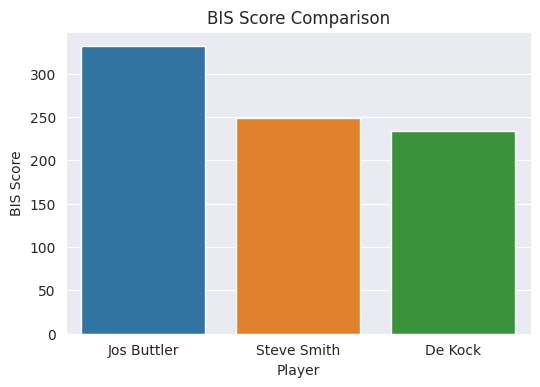

In [62]:
fig= plt.figure(dpi=100)
sns.barplot(x=BIS_Score['Player'],y=BIS_Score['BIS Score'])
plt.title('BIS Score Comparison')
plt.show()

Well as Jos Buttler is not in first 3 options, let's mark others for this.

**For Q3, Let's find boundaries/runs ratio for Buttler,Pandya and Pollard**



In [64]:
buttler_ratio = np.round(140/192*100,2)
print(buttler_ratio)

72.92


In [67]:
data_hp = data_m.loc[data.batsman.isin(['HH Pandya'])]

In [68]:
data_hp.batsman_runs.sum()

97

In [69]:
data_hp.total_runs.value_counts()

1    19
0    13
2    10
4     7
6     6
Name: total_runs, dtype: int64

In [84]:
hardik_boundary = (4*7)+(6*6)
print(hardik_boundary)

64


In [85]:
hardik_ratio = np.round(64/97*100,2)
print(hardik_ratio)

65.98


In [74]:
data_kp = data_m.loc[data.batsman.isin(['KA Pollard'])]

In [78]:
data_kp.batsman_runs.sum()

295

In [79]:
data_kp.total_runs.value_counts()

1    88
0    69
4    21
6    17
2    17
5     1
Name: total_runs, dtype: int64

In [86]:
pollard_boundary = (4*21)+(6*17)
print(pollard_boundary)

186


In [87]:
pollard_ratio = np.round(186/295*100,2)
print(pollard_ratio)

63.05


Clearly here also Buttler has best ratio of boundaries runs/total runs.

Let's mark others

**Let's do Q4**

**Let's find Balls taken to score 100 runs by MI and RR each**

In [103]:
data_btrr = data_n.loc[(data_n.over<=13)] # RR runs in first 13 overs v MI

In [104]:
data_btrr.total_runs.sum()

2040

In [105]:
data_btrr.match_id.nunique()

20

In [106]:
np.round(2040/20,2) # Average runs scored in first 13 overs

102.0

In [122]:
data_btmi = data_m.loc[data_m.over<=13] # MI runs in first 13 overs v RR

In [123]:
data_btmi.total_runs.sum()

1999

In [124]:
np.round(1999/20,2)

99.95

Well Its clear that they too less than 10 balls on an average more or less to score 100 runs

**Let's do Q5 now**

**Let's find BLS for Bumrah Archer**

In [129]:
data_ja = data_m.loc[data.bowler.isin(['J Archer'])]

In [130]:
data_ja.player_dismissed.value_counts()

HH Pandya         2
RG Sharma         2
KA Pollard        1
MJ McClenaghan    1
AS Yadav          1
Q de Kock         1
KH Pandya         1
Name: player_dismissed, dtype: int64

In [131]:
data_ja.dismissal_kind.value_counts()

caught    6
bowled    2
lbw       1
Name: dismissal_kind, dtype: int64

In [151]:
data_ja.over.value_counts().sum()

100

In [142]:
data_ja.total_runs.value_counts()

0    45
1    30
2    13
4     8
6     3
3     1
Name: total_runs, dtype: int64

In [138]:
data_jb = data_n.loc[data.bowler.isin(['JJ Bumrah'])]

In [139]:
data_jb.total_runs.value_counts()

1     54
0     51
4     15
2     12
6      3
10     1
3      1
Name: total_runs, dtype: int64

In [140]:
data_jb.dismissal_kind.value_counts()

caught    4
lbw       2
bowled    1
Name: dismissal_kind, dtype: int64

In [141]:
data_jb.over.value_counts().sum()

137

In [143]:
(9+45*2) - (50/11)

94.45454545454545

In [148]:
100 - (45*2.5)

-12.5

In [146]:
BLS_Archer = (94.45/-12.5)
print(BLS_Archer)

-7.556


In [147]:
(7+54*2)-(78/18)

110.66666666666667

In [149]:
137-51*2.5

9.5

In [150]:
110.66/9.5

11.648421052631578

Let's mark Archer considering our analysis

Thank You again for this amazing internship.

Looking forward to it tomorrow.

Regards,

Ashaab Rizvi

